# Q1

In [374]:
# NA volume
import numpy as np


In [375]:
nco=1.461
ncl=1.444
NA=np.sqrt(nco**2-ncl**2) # rad-> *180/pi=degree
thitaz=np.arcsin(NA/nco)

In [376]:
NA

0.2222273610516951

In [379]:
a=ncl/nco
np.arcsin(a)/np.pi*180

81.25098824128843

In [380]:
(0.445/2.445)**2

0.03312548876928417

In [373]:
# dBm -> mW
def dbmmw(x): #xdBm
    return pow(10,x/10)
# mW -> dBm
def mwdbm(P):#PmW
    return 10*(np.log(P)/np.log(10))

In [381]:
#Attenuation
def atten(P0,P):#dB
    return -10*(np.log(P/P0)/np.log(10))
def Pout(a,P0,L):#mW
    return P*pow(10,-a*L/10)

In [389]:
atten(8,1.14)

8.461851356554709

In [392]:
atten(8,16.5e-3)

26.85606042778037

# Q2

In [8]:
#SNR   BER volume
from scipy import special
import numpy as np

In [9]:
thigma=0.1  #amplitude noise variance
Im=1
Irms=Im/(2*np.sqrt(2))

Psig=Irms**2
Pn=thigma**2

SNR=Psig/Pn

BER=0.5*special.erfc(np.sqrt(SNR))

In [11]:
BER


2.8665157187919545e-07

In [14]:
# X-SNR  Y-BER
import matplotlib.pyplot as plt
from scipy import special
import numpy as np

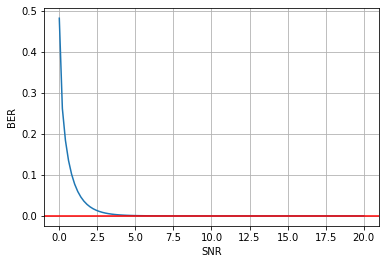

In [16]:
BER = lambda SNR:0.5*special.erfc(np.sqrt(SNR))
SNR=np.linspace(0.001,20,100)
plt.plot(SNR, BER(SNR))
plt.axhline(0,color='Red')
plt.grid()
plt.xlabel('SNR')
plt.ylabel('BER')
plt.show()

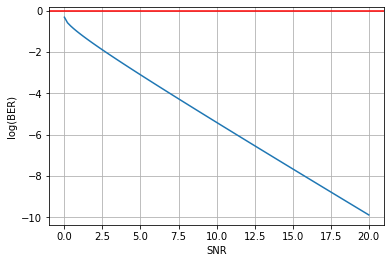

In [17]:
BER = lambda SNR:np.log(0.5*special.erfc(np.sqrt(SNR)))/np.log(10)
SNR=np.linspace(0.001,20,100)
plt.plot(SNR, BER(SNR))
plt.axhline(0,color='Red')
plt.grid()
plt.xlabel('SNR')
plt.ylabel('log(BER)')
plt.show()

# Q3

In [354]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

In [360]:

nco=1.4440
NA=0.22
c=3e8
d=1e3 #the length of fibre
ncl=np.sqrt(nco**2-NA**2)
bit_rate=1e7 #10MHz
bit_cycle=(1/bit_rate)*1e9 #ns 100 ns
time_range=10*bit_cycle  #xx*100
#delta_t=bit_cycle/2
delta_t=(d/c)*(nco-ncl)*(nco/ncl)*1e9

def h(t):  #impulse response
    return(np.heaviside(t,0)-np.heaviside(t-delta_t,0))/(delta_t)
def waveform(t,bits):
    bit=int(t/bit_cycle) # the order of bits
    if bit< bits.size:
        return bits[bit]
    return 0
def output(times, bits):
    f_input=[]
    for time in times:
        f_input += [waveform(time,bits)]
    f_input= np.array(f_input)  #list->ndarray
    #plt.plot(times,output)
    return np.convolve(h(times),f_input,mode='same')

In [361]:
times=np.linspace(0,time_range,100)
bits = np.random.randint(0,2,10)   # random integer in [0,2)

In [362]:
bits[-6:]

array([1, 1, 0, 1, 0, 0])

<function matplotlib.pyplot.show(*args, **kw)>

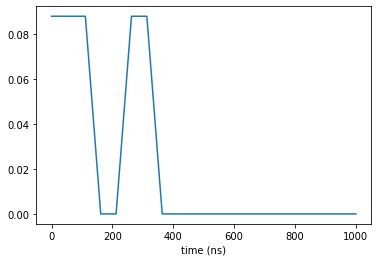

In [363]:
plt.plot(times,output(times,bits))# 1-x 2-y
plt.xlabel('time (ns)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

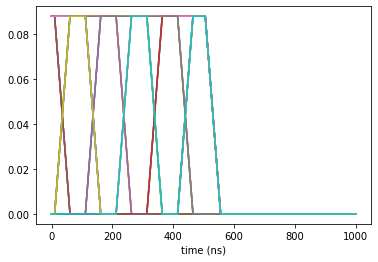

In [370]:
for i in range(20):
    bits = np.random.randint(0,2,10)   # random integer in [0,2)
    plt.plot(times,output(times,bits))# 1-x 2-y
plt.xlabel('time (ns)')
plt.show

99.2